In [4]:
#Using wine dataset from sklearn.datasets to classify wine into 3 categories using GaussianNM and MultinomialNM.
#Comparing the performance scores

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
from sklearn.datasets import load_wine
wine = load_wine()
my_df = pd.DataFrame(wine.data, columns=wine.feature_names)
my_df['target'] = wine.target
my_df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [8]:
# Splitting into inputs and target
inputs = my_df.drop(['target'], axis='columns')
target = my_df['target']
inputs.shape, target.shape

((178, 13), (178,))

In [9]:
#Splitting into Train and test
# Splitting the datasets into train and test
from sklearn.model_selection import train_test_split
inputs_train, inputs_test, target_train, target_test = train_test_split(inputs, target, test_size=0.25, random_state=88)
print("Training datasets: ", inputs_train.shape, target_train.shape)
print("Testing datasets: ", inputs_test.shape, target_test.shape)

Training datasets:  (133, 13) (133,)
Testing datasets:  (45, 13) (45,)


In [11]:
# Building the Multinomial Naive Bayes model
from sklearn.naive_bayes import MultinomialNB
Multinomial_model = MultinomialNB()

In [13]:
# Training the Multinomial model using Training data
Multinomial_model.fit(inputs_train, target_train)


MultinomialNB()

In [14]:
# Getting predicted values from the Multinomial model using testing dataset
target_pred = Multinomial_model.predict(inputs_test)
target_pred.shape, target_test.shape

((45,), (45,))

Model accuracy score:  0.8666666666666667
Model precision score:  0.8502673796791443
Model f1 score:  0.8581699346405228
Model recall score:  0.8731796812292169


Text(33.22222222222222, 0.5, 'Predicted')

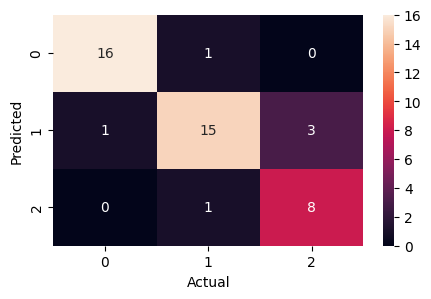

In [20]:
# Evaluating the performance of Multinomial model
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, roc_auc_score, confusion_matrix
print("Model accuracy score: ", accuracy_score(target_test, target_pred))
print("Model precision score: ", precision_score(target_test, target_pred, average='macro'))
print("Model f1 score: ", f1_score(target_test, target_pred, average='macro'))
print("Model recall score: ", recall_score(target_test, target_pred, average='macro'))
# print("Model roc-auc score: ", roc_auc_score(target_test, target_pred, multi_class='ovo'))
# print("Model confusion matrix: ", confusion_matrix(target_test, target_pred))
# To find where the model made mistakes
import seaborn as sn
plt.figure(figsize=(5,3))
sn.heatmap(confusion_matrix(target_test, target_pred), annot=True)
plt.xlabel("Actual")
plt.ylabel("Predicted")

In [21]:
# Build the Guassian Naive Bayes Model
from sklearn.naive_bayes import GaussianNB
Gaussian_model = GaussianNB()

In [23]:
# Training the Multinomial model using Training data
Gaussian_model.fit(inputs_train, target_train)

GaussianNB()

In [24]:
# Getting predicted values from the Gaussian model using testing dataset
target_pred = Gaussian_model.predict(inputs_test)
target_pred.shape, target_test.shape

((45,), (45,))

Model accuracy score:  1.0
Model precision score:  1.0
Model f1 score:  1.0
Model recall score:  1.0


Text(33.22222222222222, 0.5, 'Predicted')

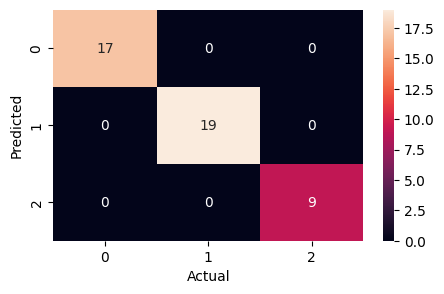

In [25]:
# Evaluating the performance of Gaussian model
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, roc_auc_score, confusion_matrix
print("Model accuracy score: ", accuracy_score(target_test, target_pred))
print("Model precision score: ", precision_score(target_test, target_pred, average='macro'))
print("Model f1 score: ", f1_score(target_test, target_pred, average='macro'))
print("Model recall score: ", recall_score(target_test, target_pred, average='macro'))
# print("Model roc-auc score: ", roc_auc_score(target_test, target_pred, multi_class='ovo'))
# print("Model confusion matrix: ", confusion_matrix(target_test, target_pred))
# To find where the model made mistakes
import seaborn as sn
plt.figure(figsize=(5,3))
sn.heatmap(confusion_matrix(target_test, target_pred), annot=True)
plt.xlabel("Actual")
plt.ylabel("Predicted")